Eitan Zavorin - Module 2 Assignment

In [1]:
import random
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import networkx as nx

In [2]:
players_df = pd.read_csv('Player.csv')
player_attributes_df = pd.read_csv('Player_Attributes.csv')

merged_df = pd.merge(players_df, player_attributes_df, on='player_api_id', how='inner')

merged_df = merged_df[merged_df['overall_rating'] >= 82]

merged_df

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,id_y,player_fifa_api_id_y,date,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
163,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139,164,152747,2011-08-30 00:00:00,...,79.0,61.0,18.0,23.0,14.0,13.0,6.0,6.0,15.0,10.0
164,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139,165,152747,2011-02-22 00:00:00,...,79.0,61.0,18.0,23.0,14.0,13.0,6.0,6.0,15.0,10.0
165,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139,166,152747,2010-08-30 00:00:00,...,79.0,61.0,18.0,23.0,14.0,13.0,6.0,6.0,15.0,10.0
166,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139,167,152747,2010-02-22 00:00:00,...,79.0,84.0,23.0,25.0,14.0,12.0,25.0,59.0,25.0,25.0
170,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139,171,152747,2007-08-30 00:00:00,...,79.0,74.0,23.0,34.0,14.0,12.0,25.0,59.0,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183690,11057,35724,Zlatan Ibrahimovic,41236,1981-10-03 00:00:00,195.58,209,183691,41236,2008-02-22 00:00:00,...,80.0,72.0,24.0,21.0,28.0,12.0,24.0,36.0,24.0,24.0
183691,11057,35724,Zlatan Ibrahimovic,41236,1981-10-03 00:00:00,195.58,209,183692,41236,2007-08-30 00:00:00,...,80.0,72.0,24.0,21.0,28.0,12.0,24.0,36.0,24.0,24.0
183692,11057,35724,Zlatan Ibrahimovic,41236,1981-10-03 00:00:00,195.58,209,183693,41236,2007-02-22 00:00:00,...,80.0,72.0,15.0,21.0,28.0,12.0,6.0,36.0,8.0,6.0
183972,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,183973,102359,2010-08-30 00:00:00,...,88.0,73.0,22.0,31.0,30.0,9.0,13.0,8.0,15.0,5.0


In [3]:
merged_df.drop_duplicates(subset=['player_name'], inplace=True)
merged_df = merged_df.dropna()
df = merged_df.drop(columns=['id_y', 'player_fifa_api_id_y', 'id_x', 'player_api_id', 'player_fifa_api_id_x', 'birthday', 'height', 'weight', 'preferred_foot', 'date', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'])

df

,player_name,overall_rating,potential,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle
163,Aaron Lennon,82.0,83.0,high,medium,79.0,68.0,27.0,77.0,69.0,...,52.0,56.0,56.0,36.0,79.0,79.0,61.0,18.0,23.0,14.0
269,Aaron Ramsey,82.0,85.0,high,high,75.0,75.0,58.0,83.0,79.0,...,69.0,75.0,74.0,69.0,83.0,81.0,75.0,62.0,74.0,68.0
899,Abdulkader Keita,82.0,82.0,medium,medium,75.0,72.0,77.0,73.0,69.0,...,89.0,78.0,75.0,37.0,85.0,70.0,84.0,13.0,28.0,23.0
1743,Adam Johnson,82.0,85.0,high,medium,83.0,77.0,43.0,77.0,66.0,...,64.0,76.0,61.0,47.0,80.0,80.0,65.0,38.0,32.0,33.0
2521,Adil Rami,82.0,87.0,high,medium,52.0,47.0,87.0,65.0,63.0,...,90.0,52.0,78.0,83.0,28.0,51.0,54.0,82.0,87.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182360,Younes Belhanda,82.0,86.0,medium,high,75.0,76.0,67.0,84.0,69.0,...,69.0,77.0,78.0,66.0,82.0,86.0,70.0,49.0,54.0,52.0
182784,Yuri Zhirkov,83.0,88.0,medium,medium,88.0,70.0,62.0,82.0,71.0,...,74.0,81.0,70.0,84.0,79.0,82.0,69.0,83.0,77.0,84.0
183481,Ze Roberto,82.0,76.0,medium,medium,78.0,58.0,65.0,86.0,66.0,...,69.0,56.0,63.0,76.0,79.0,91.0,68.0,73.0,84.0,84.0
183672,Zlatan Ibrahimovic,89.0,89.0,medium,low,76.0,90.0,76.0,84.0,92.0,...,93.0,88.0,84.0,20.0,86.0,83.0,91.0,15.0,41.0,27.0


In [4]:
g = nx.Graph() # Build the graph

In [5]:
# Iterate through the DataFrame and add each player as a node
for index, row in df.iterrows():
    
    player_name = row['player_name']
    
    # Add the player as a node to the graph
    g.add_node(player_name, player_name=player_name)

In [6]:
# Iterate through the DataFrame to create edges based on shared attributes
for index1, row1 in df.iterrows():
    player1_name = row1['player_name']
    player1_attributes = row1.drop('player_name')  # Drop the player name column

    shared_attributes_count = 0  # Counter for shared attributes

    for index2, row2 in df.iterrows():
        player2_name = row2['player_name']
        player2_attributes = row2.drop('player_name')  # Drop the player name column

        # Check if players share exact values for at least 5 attributes
        if (player1_attributes == player2_attributes).sum() >= 7 and player1_name != player2_name:
            # Add an edge between the two players
            g.add_edge(player1_name, player2_name)


In [7]:
# If you want to explore this graph in Gephi or some other
#. graph analysis tool, NetworkX makes it easy to export data.
#. Here, we use the GraphML format, which Gephi can read 
#. natively, to keep node attributes like Actor Name
nx.write_graphml(g, "soccer_player_network.graphml")

In [8]:
top_k = 50 # how many of the most central nodes to print

In [9]:
# Calculate degree centrality for all nodes
centrality_degree = nx.degree_centrality(g)

# sort node-centrality dictionary by metric, and reverse to get top elements first
for u in sorted(centrality_degree, key=centrality_degree.get, reverse=True)[:top_k]:
    print(g.nodes[u]['player_name'], centrality_degree[u])

Iker Casillas 0.02463054187192118
Mario Gomez 0.02134646962233169
Mickael Landreau 0.02134646962233169
Carlos Kameni 0.019704433497536946
Sebastian Frey 0.019704433497536946
Florent Malouda 0.0180623973727422
Gabi 0.0180623973727422
Heiko Westermann 0.0180623973727422
Helton 0.0180623973727422
Jakub Blaszczykowski 0.0180623973727422
Fernando Torres 0.016420361247947456
Lucho Gonzalez 0.016420361247947456
Morgan De Sanctis 0.016420361247947456
Rene Adler 0.016420361247947456
Roman Weidenfeller 0.016420361247947456
Salvatore Sirigu 0.016420361247947456
Tim Howard 0.016420361247947456
Christian Abbiati 0.014778325123152709
Diego Lopez 0.014778325123152709
Loic Perrin 0.014778325123152709
Pepe Reina 0.014778325123152709
Shay Given 0.014778325123152709
Simon Mignolet 0.014778325123152709
Antonio Di Natale 0.013136288998357963
Fabio Quagliarella 0.013136288998357963
Ibrahim Afellay 0.013136288998357963
Jaroslav Drobny 0.013136288998357963
Marek Hamsik 0.013136288998357963
Mirko Vucinic 0.013

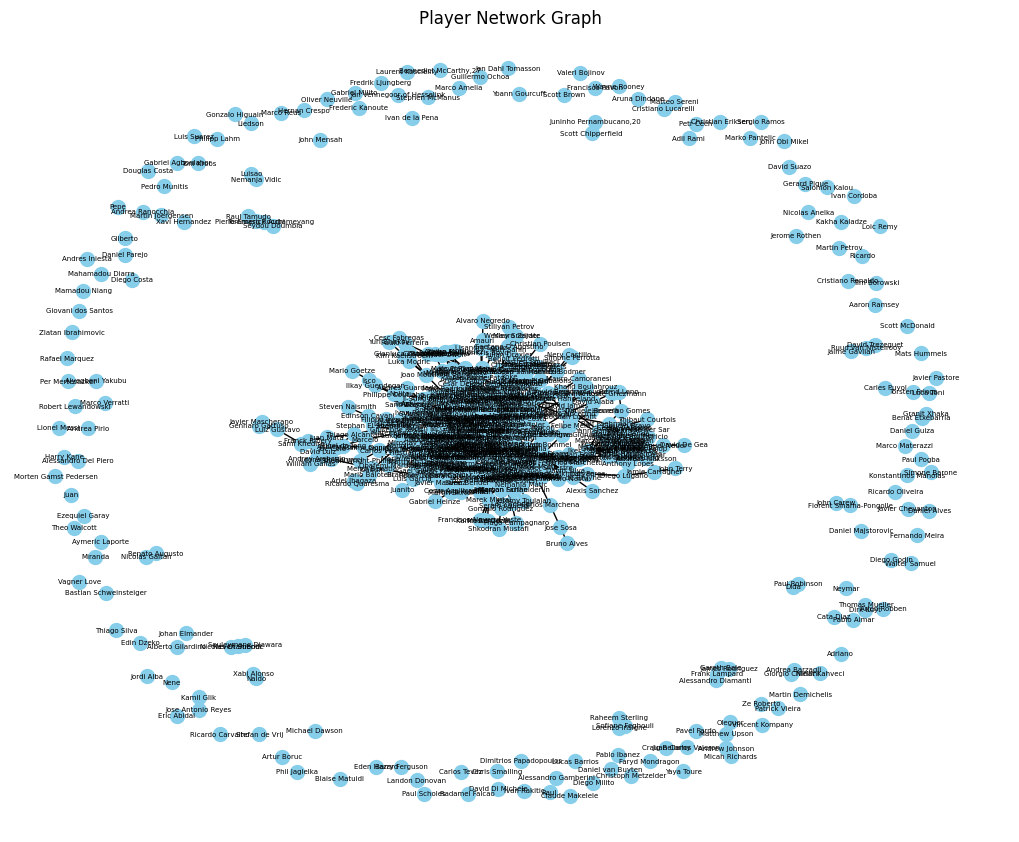

In [11]:
# Draw the network graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(g, seed=42)  # Specify the layout algorithm and seed for reproducibility
nx.draw(g, pos, with_labels=True, node_size=100, font_size=5, node_color='skyblue')
plt.title('Player Network Graph')
plt.show()